Extracting /root/PycharmProjects/test/MNIST_data/train-images-idx3-ubyte.gz


Extracting /root/PycharmProjects/test/MNIST_data/train-labels-idx1-ubyte.gz
Extracting /root/PycharmProjects/test/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /root/PycharmProjects/test/MNIST_data/t10k-labels-idx1-ubyte.gz


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] ; 数字= 0


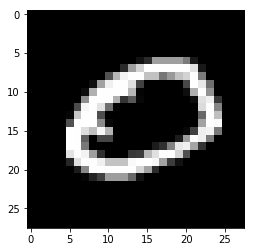

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] ; 数字= 7


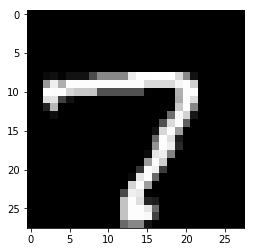

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] ; 数字= 5


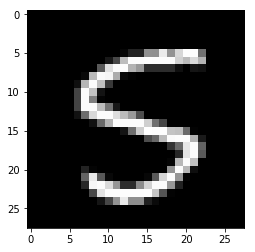

正确率 0.4518


In [ ]:
# ImportError: No module named input_data
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as Image
# Just disables the warning, doesn't enable AVX/FMA
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


def show_bmp(im_arr):
    # 参考：http://blog.csdn.net/u010194274/article/details/50817999
    im = np.array(im_arr)
    im = im.reshape(28, 28)

    fig = plt.figure()
    plotwindow = fig.add_subplot(111)
    plt.imshow(im, cmap='gray')
    plt.show()

# 为了用于这个教程，我们使标签数据是"one-hot vectors"。 
# 一个one-hot向量除了某一位的数字是1以外其余各维度数字都是0。
# 所以在此教程中，数字n将表示成一个只有在第n维度（从0开始）数字为1的10维向量。比如，标签0将表示成([1,0,0,0,0,0,0,0,0,0])。
mnist = input_data.read_data_sets('/root/PycharmProjects/test/MNIST_data', one_hot=True)

x = tf.placeholder("float", [None, 784])

W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

y = tf.nn.softmax(tf.matmul(x, W) + b)

y_ = tf.placeholder("float", [None, 10])
# 计算交叉熵（越小越好）:
cross_entropy = -tf.reduce_sum(y_ * tf.log(y))

# 学习时，使用梯度下降优化器算法，要求cross_entropy值最小
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)
# 初始化变量
init = tf.global_variables_initializer()

sess = tf.Session()
# 开始初始化变量
sess.run(init)

# 用于将 one-hot向量 变为数字
mask = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 

for i in range(3):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    # 显示标签的 one-hot 向量 及其 数字
    print(batch_ys[0], '; 数字=', np.matmul(batch_ys[0], mask).astype(np.uint))
    # 显示数字的图片
    show_bmp(batch_xs[0])  
    # 输入 feed_dict 数据，进行学习
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
# argmax返回的是最大数的索引.argmax有一个参数axis=1,表示第1维的最大值.
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
# 最后，我们计算所学习到的模型在测试数据集上面的正确率。
print('正确率', sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

sess.close()
